In [24]:
import numpy as np
import matplotlib.pyplot as plt
def create_Zipfs_distribution(n_words, n_swaps, initial_fuel = 0.01, initial_offset=100, depletion_offset=10):
    # returns a word value array starting at 1
    words_to_swap = np.random.randint(initial_offset, n_words, size=n_swaps)
    new_positions = []
    for word_id in words_to_swap:
        fuel = initial_fuel
        curr_id=word_id
        while fuel > 0 and curr_id > 0 :
            fuel -= (1/curr_id - 1/(curr_id+depletion_offset))
            curr_id -= 1
        new_positions.append((curr_id, word_id))
    
    word_ids = np.arange(n_words, dtype=int) 
    for new_pos, word_id in new_positions:
        pos = np.argwhere(word_ids==word_id)
        word_ids = np.delete(word_ids, pos)
        word_ids = np.insert(word_ids, new_pos, word_id)
    out=np.empty(n_words, dtype=int)
    out[word_ids] = np.arange(n_words, dtype=int)
    return out+1

In [25]:
n=10000
arr=create_Zipfs_distribution(n,100)
assert(np.count_nonzero(arr==sorted(arr))>0)
assert(len(np.unique(arr))==n)

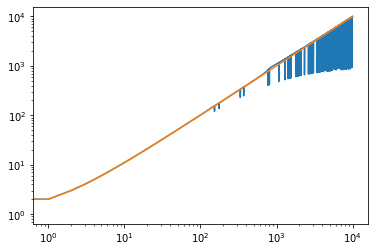

In [47]:
plt.loglog(create_Zipfs_distribution(n, 100, initial_fuel=0.1, initial_offset=30, depletion_offset=100))
plt.loglog(np.arange(1,n+1))